In [1]:

from google.colab import files
uploaded = files.upload()

Saving mall.xlsx to mall.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install seaborn

In [4]:
import seaborn as sns

In [7]:
df =pd.read_excel("mall.xlsx")

In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.drop('CustomerID',axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace =True) #renaming the columns name

In [15]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.nunique()#unique value in full dataset

,0
Gender,2
Age,51
Income,64
Score,84


# ***Visualization***

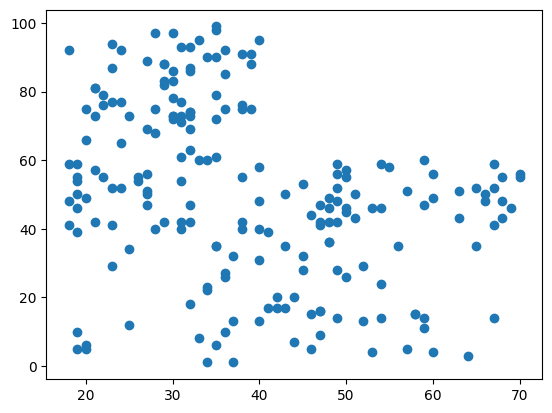

In [19]:
#2D visualization
plt.scatter(df.Age,df.Score)

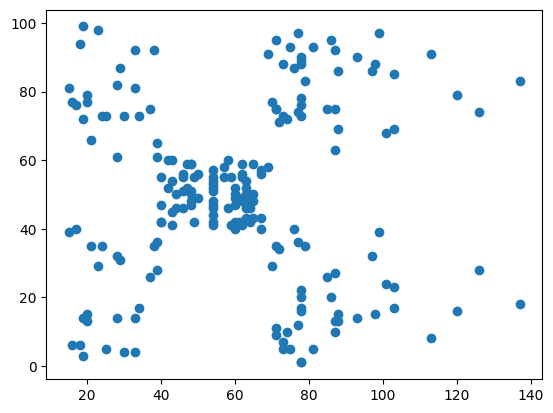

In [20]:
plt.scatter(df.Income,df.Score)

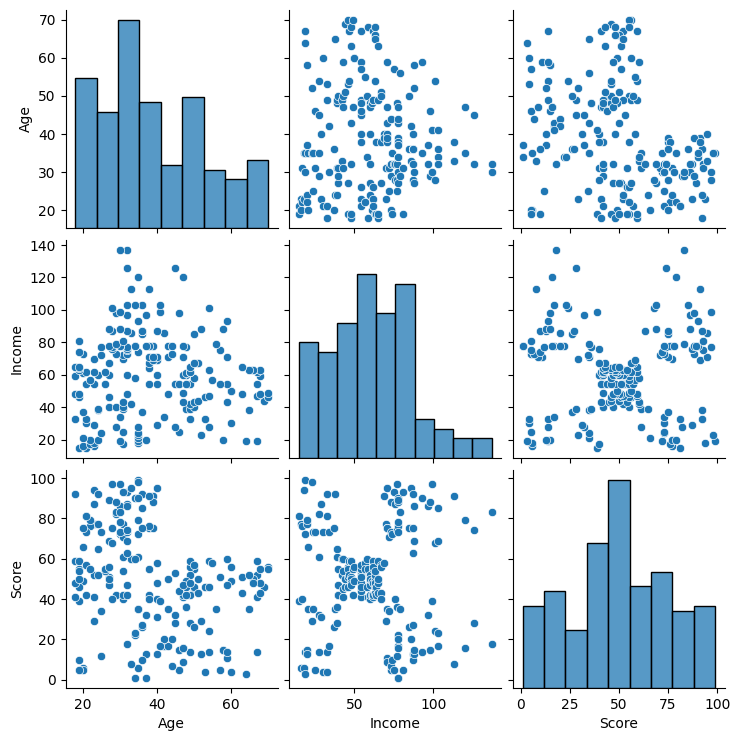

In [21]:
sns.pairplot(df[['Age','Income','Score']])#pairplot => can show scatterplot(onno kono column asle) and histblot(nije der sapekhe)

In [22]:
import sklearn.cluster as cluster

In [27]:
kmeans = cluster.KMeans()
kmeans

KMeans()

In [29]:
pred = kmeans.fit_predict(df[['Income','Score']])

In [30]:
pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 1, 2, 1, 2, 1, 5, 1, 5, 1,
       2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6], dtype=int32)

In [31]:
df1 =df.copy()

In [32]:
df1.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [33]:
df1['Predicted'] = pred

In [34]:
df1.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [35]:
#initial center find out
centers = kmeans.cluster_centers_
centers

array([[ 25.14285714,  19.52380952],
       [ 80.375     ,  82.9375    ],
       [ 73.75      ,  33.875     ],
       [ 25.0952381 ,  80.04761905],
       [ 44.46875   ,  50.8125    ],
       [ 89.77419355,  15.38709677],
       [114.71428571,  78.42857143],
       [ 60.125     ,  49.41666667]])

In [36]:
df2 = df1[df1.Predicted==0]
df3 = df1[df1.Predicted==1]
df4 = df1[df1.Predicted==2]
df5 = df1[df1.Predicted==3]
df6 = df1[df1.Predicted==4]
df7 = df1[df1.Predicted==5]
df8 = df1[df1.Predicted==6]
df9 = df1[df1.Predicted==8]

In [39]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,0
2,Female,20,16,6,0
4,Female,31,17,40,0
6,Female,35,18,6,0
8,Male,64,19,3,0


In [40]:
df3.head()

,Gender,Age,Income,Score,Predicted
123,Male,39,69,91,1
125,Female,31,70,77,1
127,Male,40,71,95,1
129,Male,38,71,75,1
131,Male,39,71,75,1


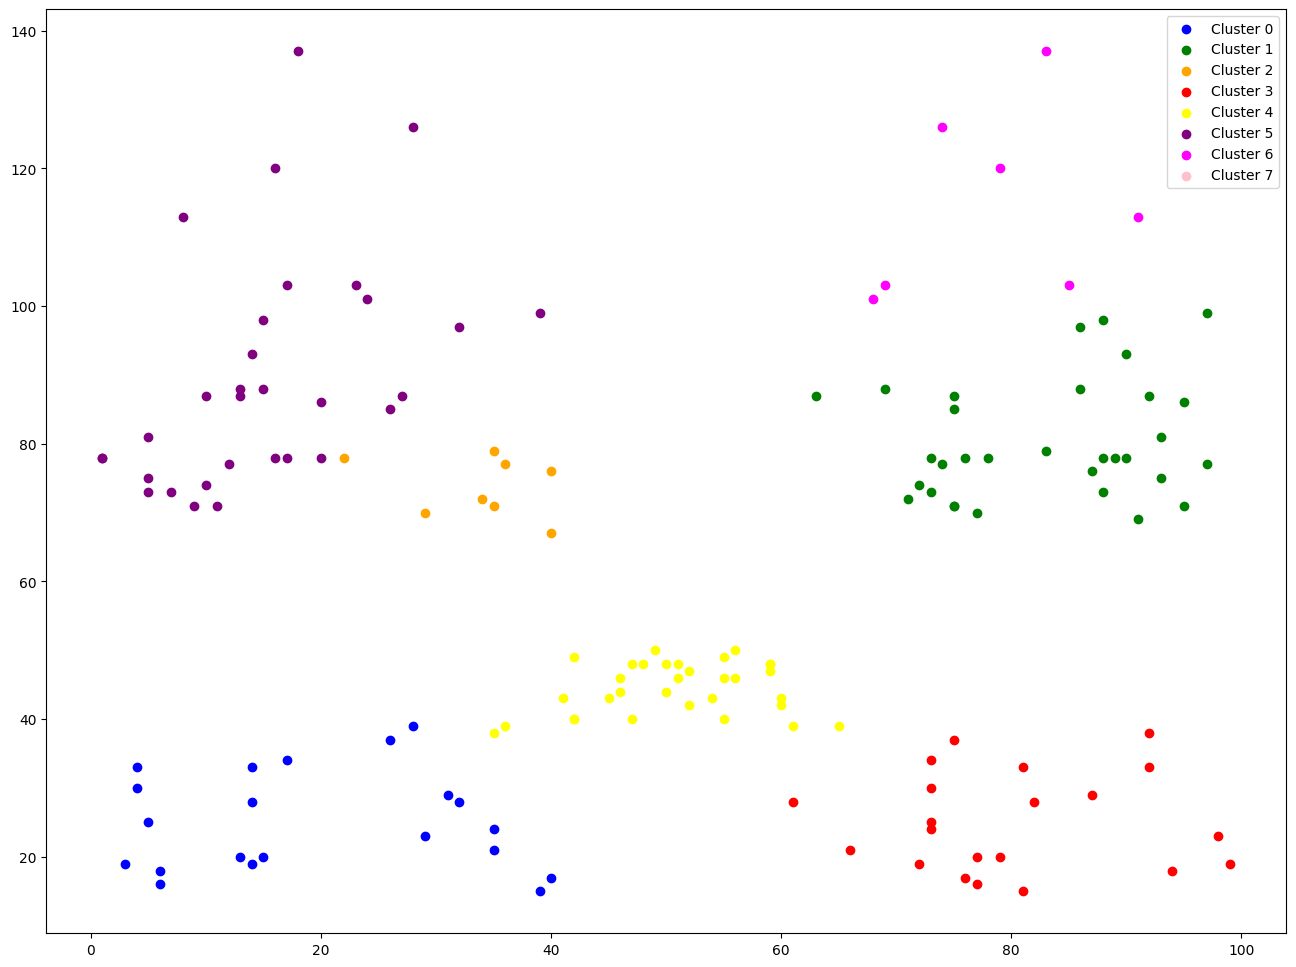

In [42]:
plt.figure(figsize=(16,12))
plt.scatter(df2['Score'], df2['Income'], color='blue', label='Cluster 0')
plt.scatter(df3['Score'], df3['Income'], color='green', label='Cluster 1')
plt.scatter(df4['Score'], df4['Income'], color='orange', label='Cluster 2')
plt.scatter(df5['Score'], df5['Income'], color='red', label='Cluster 3')
plt.scatter(df6['Score'], df6['Income'], color='yellow', label='Cluster 4')
plt.scatter(df7['Score'], df7['Income'], color='purple', label='Cluster 5')
plt.scatter(df8['Score'], df8['Income'], color='fuchsia', label='Cluster 6')
plt.scatter(df9['Score'], df9['Income'], color='pink', label='Cluster 7')
plt.legend()

# ***Elbow Method***

In [43]:
from sklearn.cluster import KMeans

In [44]:
wcss = []#to keep error

In [46]:
cluster = range(1,15)
for k in cluster:
  kmean = KMeans(n_clusters=k)
  kmean.fit(df[['Income','Score']])
  wcss.append(kmean.inertia_)#inertia_ => findout the error

In [47]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 37442.24745037571,
 30552.714025467285,
 29893.521011933182,
 23418.712424631834,
 25304.158972410303,
 19755.798527349234,
 16561.37165114018,
 15059.97490506569,
 14347.955847476851]

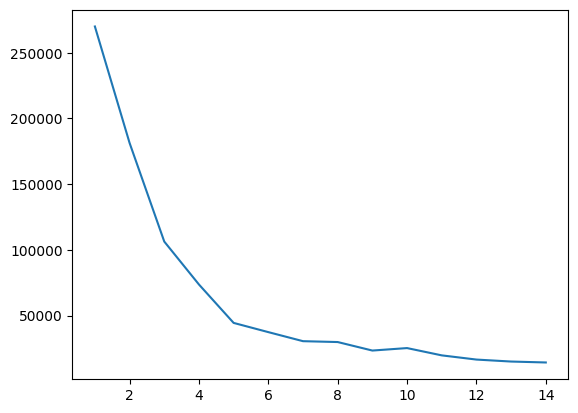

In [48]:
plt.plot(cluster,wcss) #elbow

In [50]:
!pip install kneed

In [51]:
from kneed import KneeLocator

In [55]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve ='convex')

In [56]:
kn

In [57]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


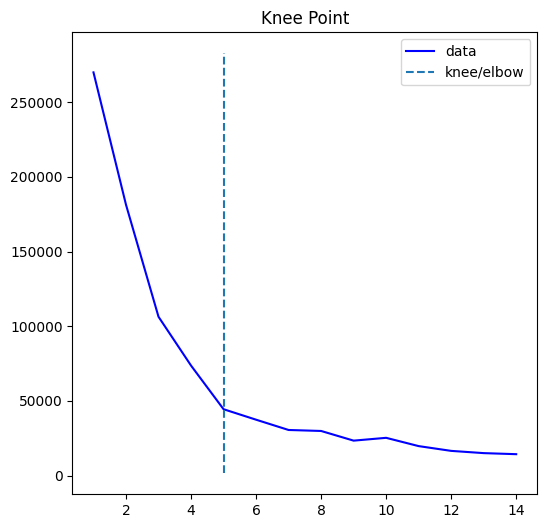

In [58]:
kn.plot_knee()

# ***After Select Best K***

In [59]:
import sklearn.cluster as cluster

In [65]:
kmeans = cluster.KMeans(n_clusters=5)

In [66]:
predicted = kmeans.fit_predict(df[['Income','Score']])

In [67]:
predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [68]:
df['predicted'] = predicted

In [69]:
df.head()

,Gender,Age,Income,Score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


In [70]:
center2 = kmeans.cluster_centers_
center2

array([[87.75      , 17.58333333],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.0875    , 49.7125    ]])

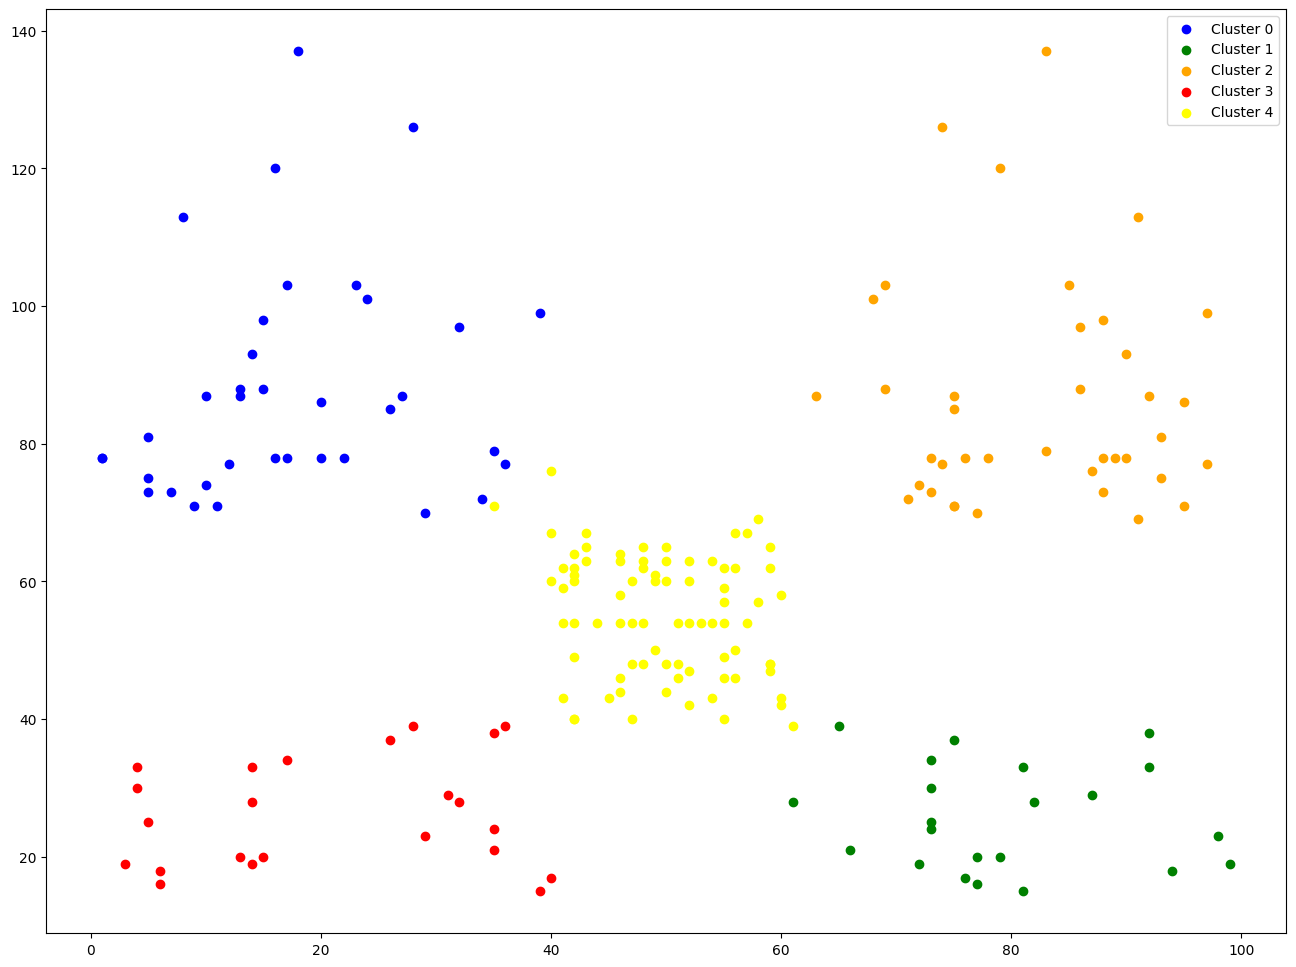

In [73]:
# Split original dataframe into clusters
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(16, 12))
plt.scatter(df0['Score'], df0['Income'], color='blue', label='Cluster 0')
plt.scatter(df1['Score'], df1['Income'], color='green', label='Cluster 1')
plt.scatter(df2['Score'], df2['Income'], color='orange', label='Cluster 2')
plt.scatter(df3['Score'], df3['Income'], color='red', label='Cluster 3')
plt.scatter(df4['Score'], df4['Income'], color='yellow', label='Cluster 4')

plt.legend()